'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
    Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
1            5.1         3.5          1.4         0.2     setosa
2            4.9         3.0          1.4         0.2     setosa
3            4.7         3.2          1.3         0.2     setosa
4            4.6         3.1          1.5         0.2     setosa
5            5.0         3.6          1.4         0.2     setosa
6            5.4         3.9          1.7         0.4     setosa
7            4.6         3.4          1.4         0.3     setosa
8            5.0         3.4          1.5         0.2     setosa
9            4.4         2.9   


	 Conditional inference tree with 4 terminal nodes

Response:  Species 
Inputs:  Sepal.Length, Sepal.Width, Petal.Length, Petal.Width 
Number of observations:  150 

1) Petal.Length <= 1.9; criterion = 1, statistic = 140.264
  2)*  weights = 50 
1) Petal.Length > 1.9
  3) Petal.Width <= 1.7; criterion = 1, statistic = 67.894
    4) Petal.Length <= 4.8; criterion = 0.999, statistic = 13.865
      5)*  weights = 46 
    4) Petal.Length > 4.8
      6)*  weights = 8 
  3) Petal.Width > 1.7
    7)*  weights = 46 


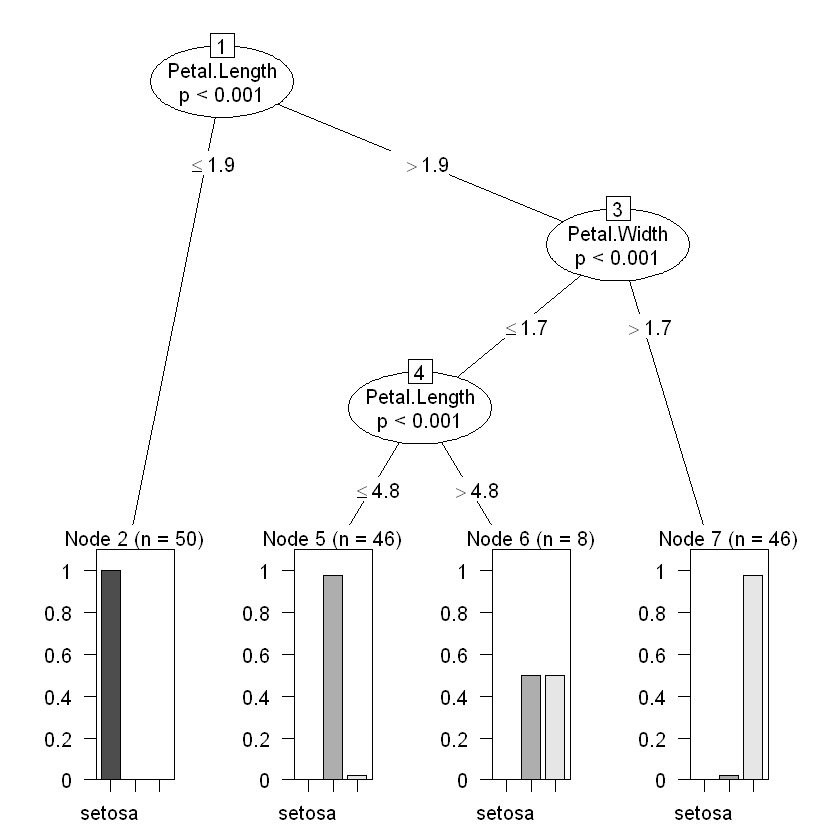

In [3]:
# Refer to http://www.rdatamining.com/examples
# Decision tree, should install party package first
# party has conditional inference tree function called ctree
# Once installed, comment it
#install.packages('party', repos='http://cran.us.r-project.org')
library(party)#include 대신에
# Compactly display the internal "structure" of an R object
str(iris)#summary보여줌. dataframe의 함수 #iris는 꽃에 대한 데이터. 5개 변수로 이루어져 있고 150개 객체로
print(iris)#factor는  unique level인데 여기는 3개 speices
# sepal : 꽃받침, petal : 꽃잎
iris_ctree <- ctree(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, data=iris)
# conditional tree. Target ~ list of input independent variables ~이거 전이 타겟 변수
# ctree does not need pruning since it branches based on significance
# thus tends not to overfit
print(iris_ctree)
plot(iris_ctree)

## 출력된 그래프가 100% 분류되지 않은 채로 나옴 - > 왜? ## overfitting의 위험. 
 ## -> pruning(가지치기) 를 함. 이 ctree는 안해도 됨. 만약에 100퍼 나오는 게 있으면 그건 해야됨

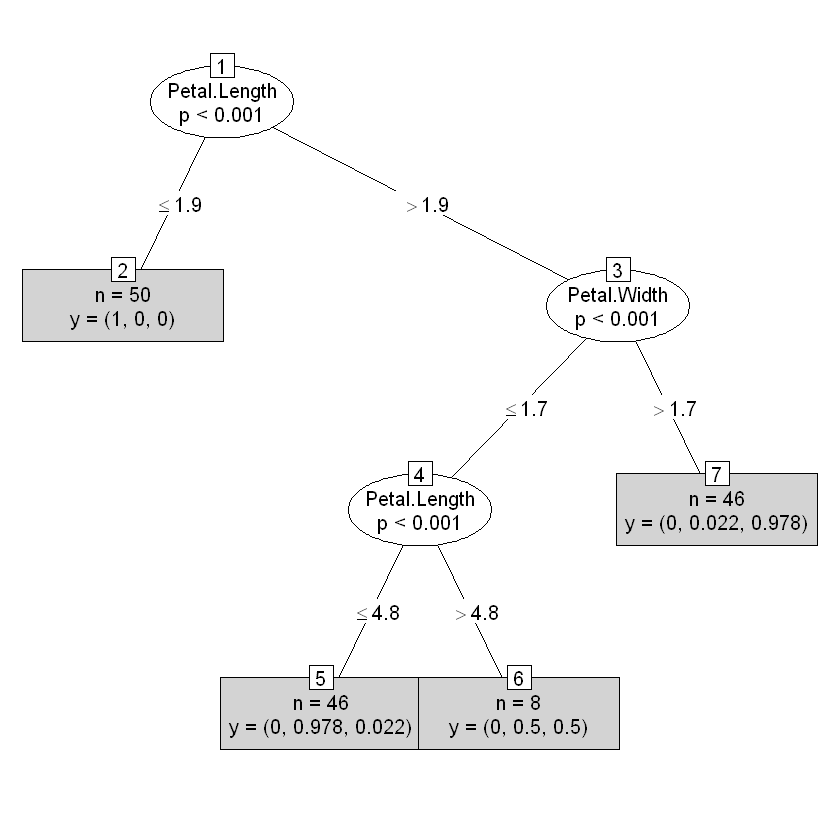

In [4]:
plot(iris_ctree, type="simple")#다른 그래프 타입

In [5]:
# Decision tree for Heart data
# Refer to http://www.dodomira.com/2016/05/29/564/
df<-read.csv('http://www-bcf.usc.edu/~gareth/ISL/Heart.csv')
str(df)

'data.frame':	303 obs. of  15 variables:
 $ X        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Age      : int  63 67 67 37 41 56 62 57 63 53 ...
 $ Sex      : int  1 1 1 1 0 1 0 0 1 1 ...
 $ ChestPain: Factor w/ 4 levels "asymptomatic",..: 4 1 1 2 3 3 1 1 1 1 ...
 $ RestBP   : int  145 160 120 130 130 120 140 120 130 140 ...
 $ Chol     : int  233 286 229 250 204 236 268 354 254 203 ...
 $ Fbs      : int  1 0 0 0 0 0 0 0 0 1 ...
 $ RestECG  : int  2 2 2 0 2 0 2 0 2 2 ...
 $ MaxHR    : int  150 108 129 187 172 178 160 163 147 155 ...
 $ ExAng    : int  0 1 1 0 0 0 0 1 0 1 ...
 $ Oldpeak  : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ Slope    : int  3 2 2 3 1 1 3 1 2 3 ...
 $ Ca       : int  0 3 2 0 0 0 2 0 1 0 ...
 $ Thal     : Factor w/ 3 levels "fixed","normal",..: 1 2 3 2 2 2 2 2 3 3 ...
 $ AHD      : Factor w/ 2 levels "No","Yes": 1 2 2 1 1 1 2 1 2 2 ...


In [7]:
head(df,5)
nrow(df)

X,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


[1] 303

caret::createDataPartition(
  y,          # 분류(또는 레이블)
  times=1,    # 생성할 분할의 수
  p=0.5,      # 훈련 데이터에서 사용할 데이터의 비율
  list=TRUE,  # 결과를 리스트로 반환할지 여부. FALSE면 행렬을 반환한다.
)

In [10]:
# caret : classification and regression package
#install.packages('caret', repos='http://cran.us.r-project.org')
library(caret)#include 
set.seed(1000) #reproducability setting 이 숫자를 기억해 놓고 쓰면 랜덤한 수가 달ㄹ라지지 않고 계속 이대로
# list=FALSE returns matrix, list=TRUE returns list
# df$AHD : AHD의 YES, NO 별로 각 70%씩을 train data로 지정
intrain<-createDataPartition(y=df$AHD, p=0.7, list=FALSE) #트레인데이터로 70퍼센트를 쪼새서 list에 있는 걸로 반환
print (intrain)
train<-df[intrain, ]
test<-df[-intrain, ]#행에 있지 않은 데이터들

       Resample1
  [1,]         1
  [2,]         2
  [3,]         3
  [4,]         4
  [5,]         5
  [6,]         6
  [7,]         7
  [8,]         8
  [9,]        10
 [10,]        11
 [11,]        12
 [12,]        13
 [13,]        14
 [14,]        15
 [15,]        16
 [16,]        17
 [17,]        18
 [18,]        20
 [19,]        21
 [20,]        22
 [21,]        23
 [22,]        27
 [23,]        28
 [24,]        29
 [25,]        30
 [26,]        32
 [27,]        33
 [28,]        34
 [29,]        35
 [30,]        39
 [31,]        40
 [32,]        41
 [33,]        43
 [34,]        44
 [35,]        45
 [36,]        48
 [37,]        49
 [38,]        51
 [39,]        52
 [40,]        53
 [41,]        54
 [42,]        56
 [43,]        58
 [44,]        59
 [45,]        61
 [46,]        63
 [47,]        65
 [48,]        67
 [49,]        68
 [50,]        69
 [51,]        70
 [52,]        71
 [53,]        72
 [54,]        73
 [55,]        74
 [56,]        76
 [57,]        77
 [58,]        

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 209 288.700 No ( 0.53589 0.46411 )  
   2) Thal: normal 118 126.900 No ( 0.77119 0.22881 )  
     4) Age < 56.5 68  40.590 No ( 0.91176 0.08824 )  
       8) MaxHR < 154 19  23.700 No ( 0.68421 0.31579 ) *
       9) MaxHR > 154 49   0.000 No ( 1.00000 0.00000 ) *
     5) Age > 56.5 50  68.030 No ( 0.58000 0.42000 )  
      10) Slope < 1.5 29  32.050 No ( 0.75862 0.24138 )  
        20) Oldpeak < 0.1 18  24.060 No ( 0.61111 0.38889 )  
          40) RestBP < 124.5 5   0.000 No ( 1.00000 0.00000 ) *
          41) RestBP > 124.5 13  17.940 Yes ( 0.46154 0.53846 )  
            82) Chol < 303.5 8   8.997 No ( 0.75000 0.25000 ) *
            83) Chol > 303.5 5   0.000 Yes ( 0.00000 1.00000 ) *
        21) Oldpeak > 0.1 11   0.000 No ( 1.00000 0.00000 ) *
      11) Slope > 1.5 21  26.730 Yes ( 0.33333 0.66667 )  
        22) ChestPain: nonanginal,typical 6   7.638 No ( 0.66667 0.33333 ) *
        23) ChestPain: 

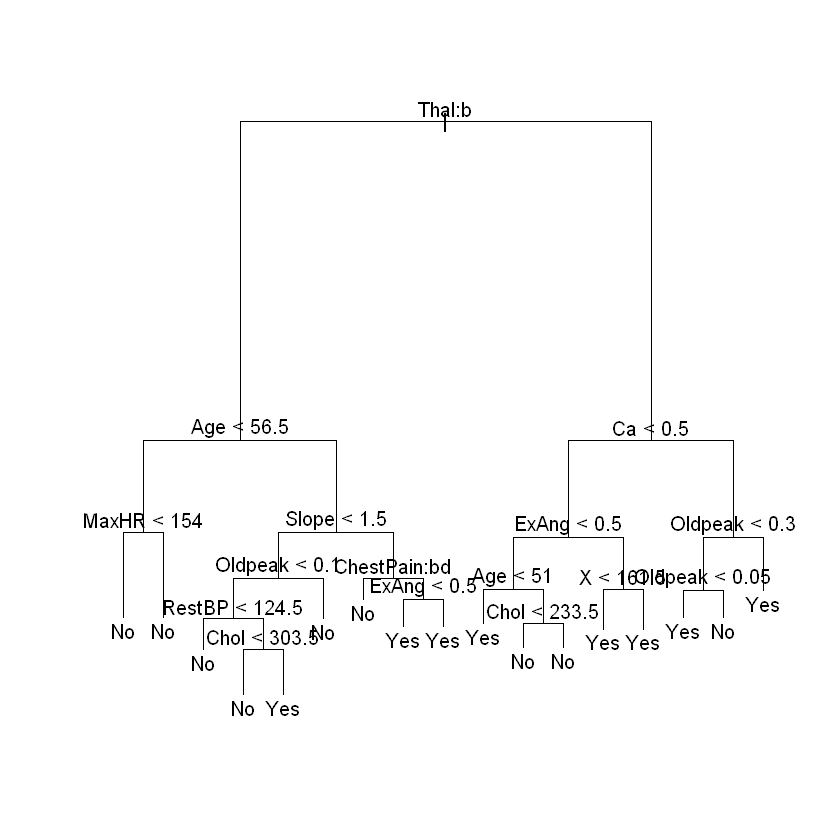

In [13]:
#install.packages('tree', repos='http://cran.us.r-project.org')
library(tree)
treemod<-tree(AHD~. , data=train)#타켓 ~input들
plot(treemod)
text(treemod)
print(treemod)

## cross-validation : training data를 같은 사이즈의 k개로 나눠서 얼마를 training데이터로 나머지를 validation 용으로. 검증용으로 k번 수행해서 최고 평균 값으로

test data와 다름. test data는 최종으로 만들어진 모델을 가지고 이제 실전

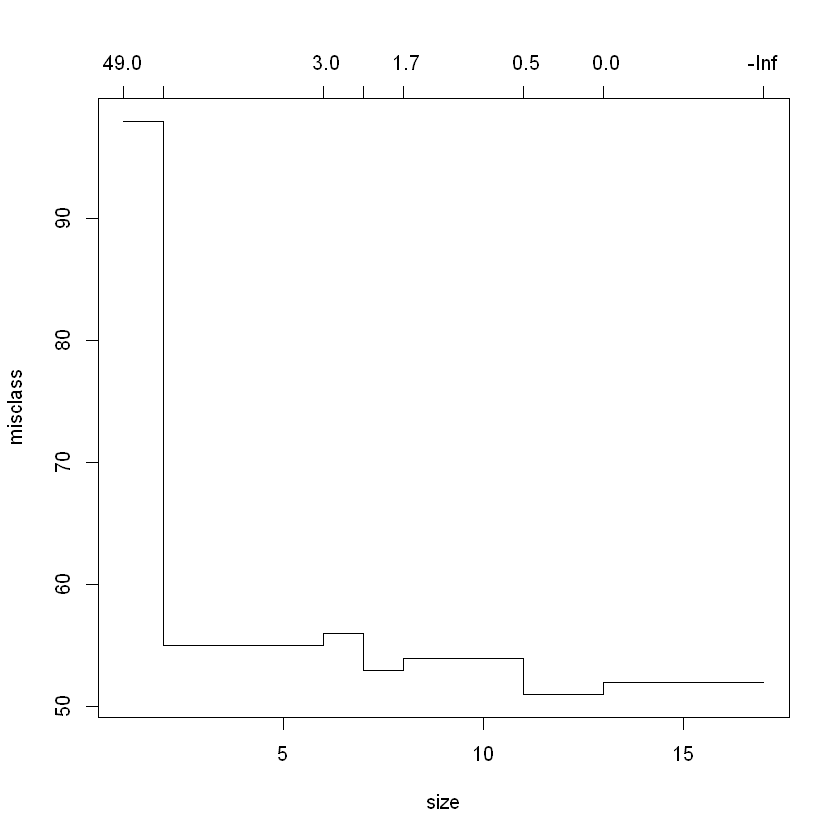

In [14]:
# tree needs pruning due to overfitting whereas ctree does not.오버피팅의 가능성땜ㄴ에
# Do pruning using k-fold cross-validation 프루닝함
# Divide train set into K groups. Use K-1 groups for training and 1 group for validation. 
# Repeat K times and take average performance. Try for different K's and choose the one giving the best average.
# k 값에 변화를 줘서 가장 좋은 k값으로 
# (Do partition several times and choose the one with min variance)
# cv = cross validation, FUN : pruning function name
cv.trees<-cv.tree(treemod, FUN=prune.misclass ) # for classification decision tree 프루닝
plot(cv.trees) # k값에 따른 misclass 정도
#12 이 정도가 젤 낮으니까 이게 젤 좋겠네

# set best to size with min variance

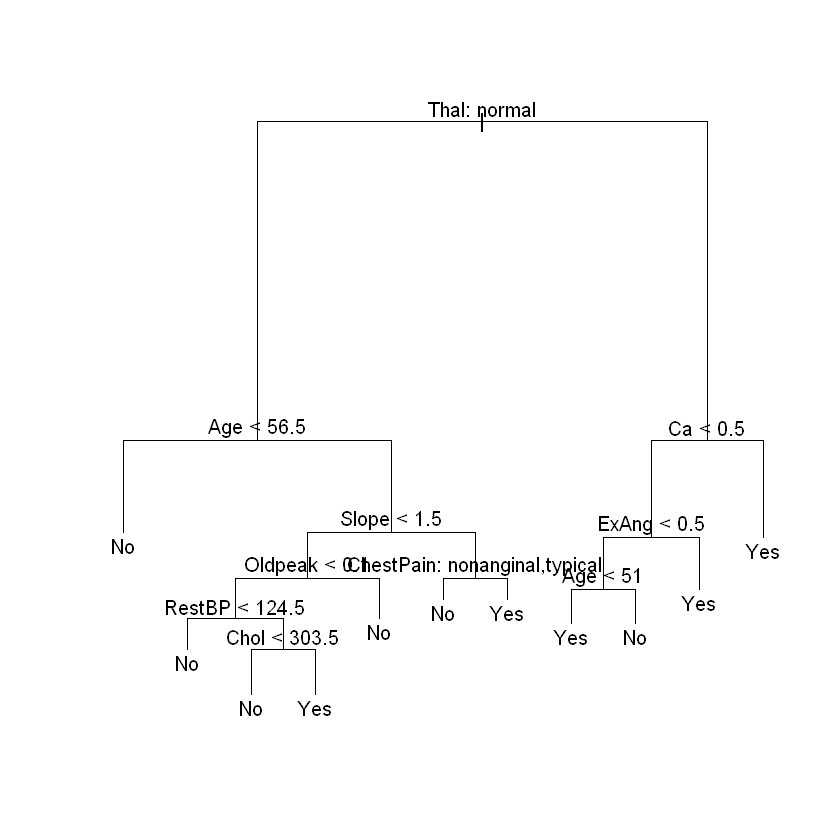

In [15]:
prune.trees <- prune.misclass(treemod, best=11)  # for regression decision tree, use prune.tree function
plot(prune.trees)
text(prune.trees, pretty=0)

# Do prediction on test set and evaluate the model

In [18]:
#install.packages('e1071', repos='http://cran.us.r-project.org')
# e1071 contains statistical functions such as support vector machine, 
# naive Bayes, Fourier transform, fuzzy clustering, etc.
library(e1071)
print("Prediction for test set")
treepred <- predict(prune.trees, test, type='class')#test data setㅇ으로
confusionMatrix(treepred, test$AHD)# 모델이 얼마나 예측에 불 정확한가 yes가 yes이고 no가 no 인게 정확 yy + n/전체
print("Prediction for training set")
treepred <- predict(prune.trees, train, type='class')#type는 거르는 거. class는 label주고 response는 숫자를 줌
confusionMatrix(treepred, train$AHD)

[1] "Prediction for test set"


Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  38  10
       Yes 11  31
                                          
               Accuracy : 0.7667          
                 95% CI : (0.6657, 0.8494)
    No Information Rate : 0.5444          
    P-Value [Acc > NIR] : 1.061e-05       
                                          
                  Kappa : 0.5306          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.7755          
            Specificity : 0.7561          
         Pos Pred Value : 0.7917          
         Neg Pred Value : 0.7381          
             Prevalence : 0.5444          
         Detection Rate : 0.4222          
   Detection Prevalence : 0.5333          
      Balanced Accuracy : 0.7658          
                                          
       'Positive' Class : No              
                                          

[1] "Prediction for training set"


Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  102  12
       Yes  13  86
                                          
               Accuracy : 0.8826          
                 95% CI : (0.8316, 0.9226)
    No Information Rate : 0.5399          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7639          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8870          
            Specificity : 0.8776          
         Pos Pred Value : 0.8947          
         Neg Pred Value : 0.8687          
             Prevalence : 0.5399          
         Detection Rate : 0.4789          
   Detection Prevalence : 0.5352          
      Balanced Accuracy : 0.8823          
                                          
       'Positive' Class : No              
                                          